**6.1 In example 5.8 in week 5 data are on the level of plasma triglycerides for patients with and without heart disease were analyzed to show that there is evidence that the distribution of plasma is different for these two groups. These data are in the dataset 'blood'**

*(a) Using the method described in section 6.1, estimate the probability that a patient has heart disease as a function of the patients plasma triglycerides level; present the result as a plot of the estimated probability function. Choose the smoothing parameters needed using the Sheather-Jones method. Restrict the analysis to triglyceride levels in the range 0-300; to do this include the arguments from=0 to=300 in the function density*

*(b) Using the result given in part (a) estimate the probability that a patient has heart disease given a triglyceride level of y, for y=100, 200, 250*

tri=100, pr=.40

tri=200, pr=.52

tri=250, pr=.83

*(c) It is sometimes desireable to use additional smoothing to obtain a more regular estimate of the probability function. Hence repeat parts (a) and (b) including the argument adjust =3 in the function density. This uses the value of the smoothing parameter given by 3 times the Sheather-Jones value.*

Adjusting the SJ value helped smooth out some of the data which was helpful for seeing broadly if there are major differences in triglycerides and having heart disease. Interesting that the probabilities changed pretty dramatically here. Now having a high tri count doesn't shift the probability as much compared to the non adjusted function. 

tri=100, pr=.47

tri=200, pr=.52

tri=250, pr=.59

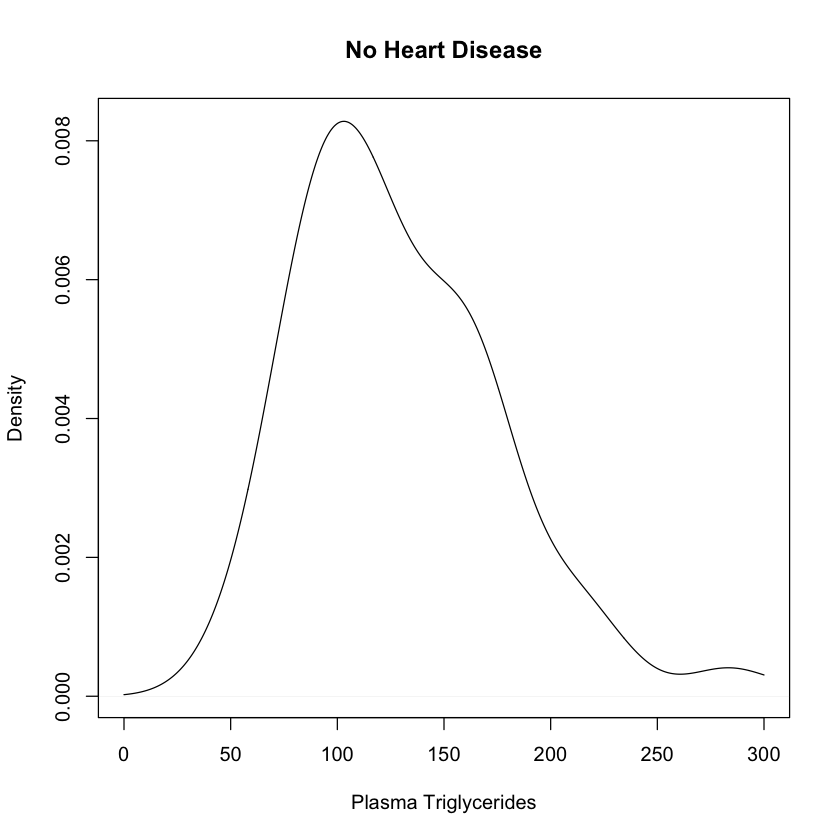

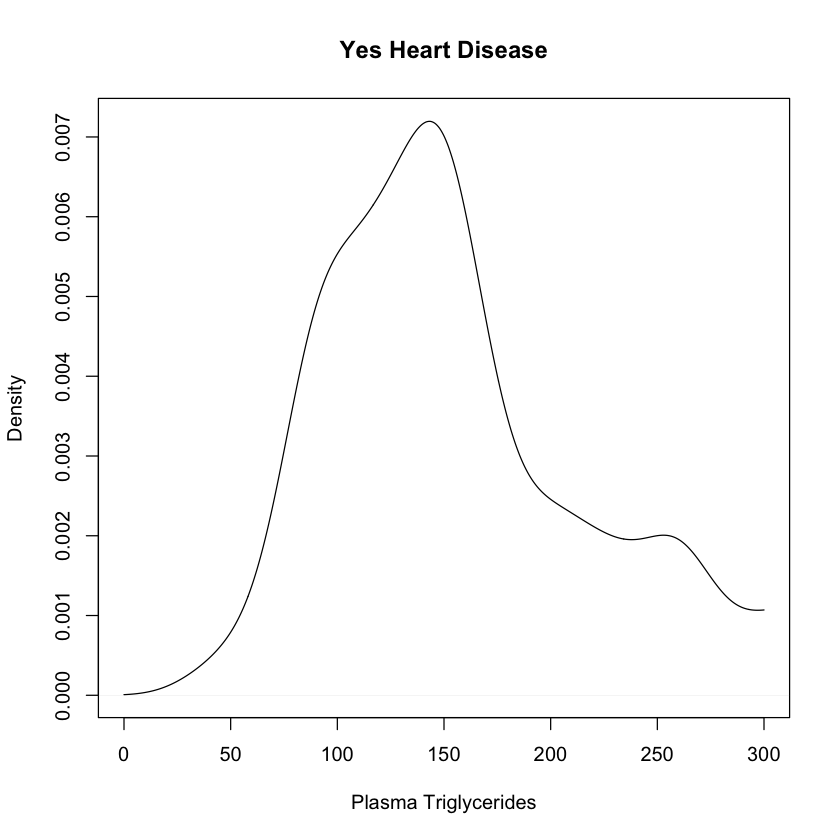

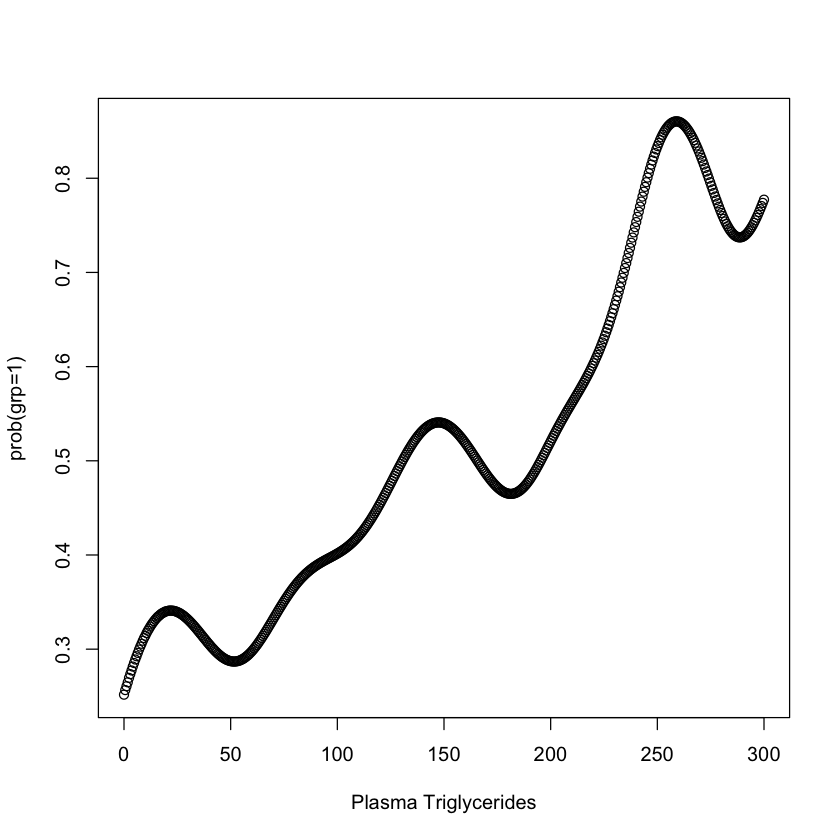

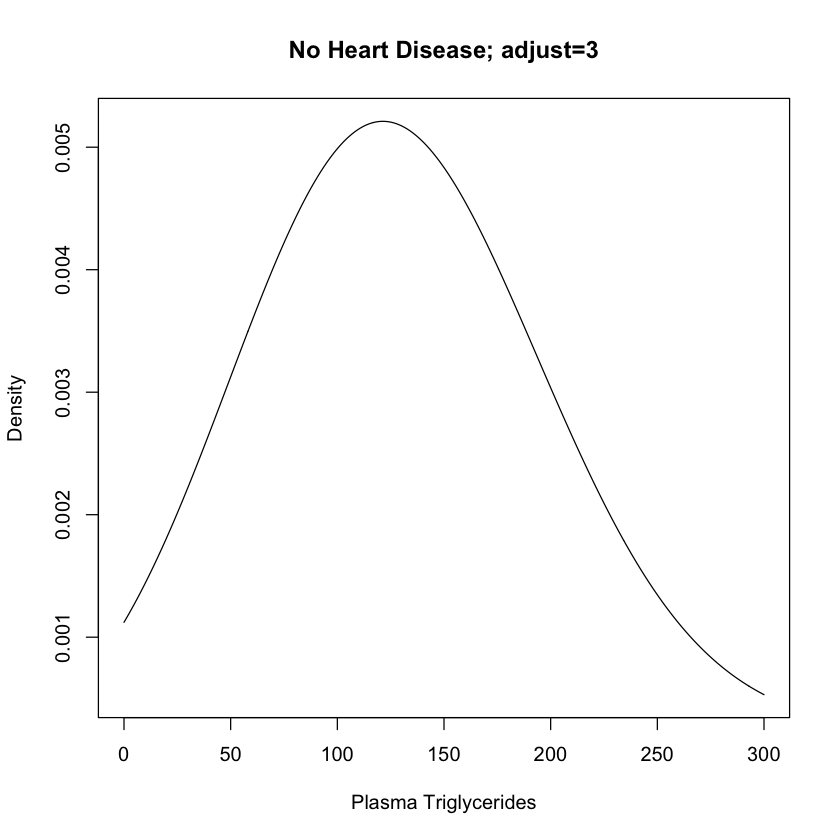

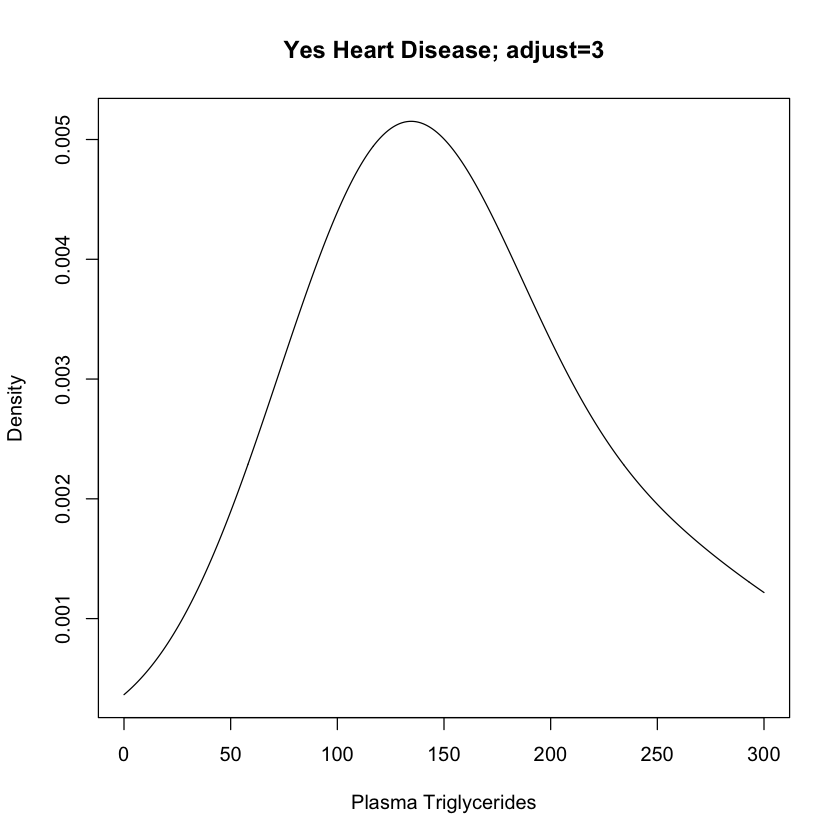

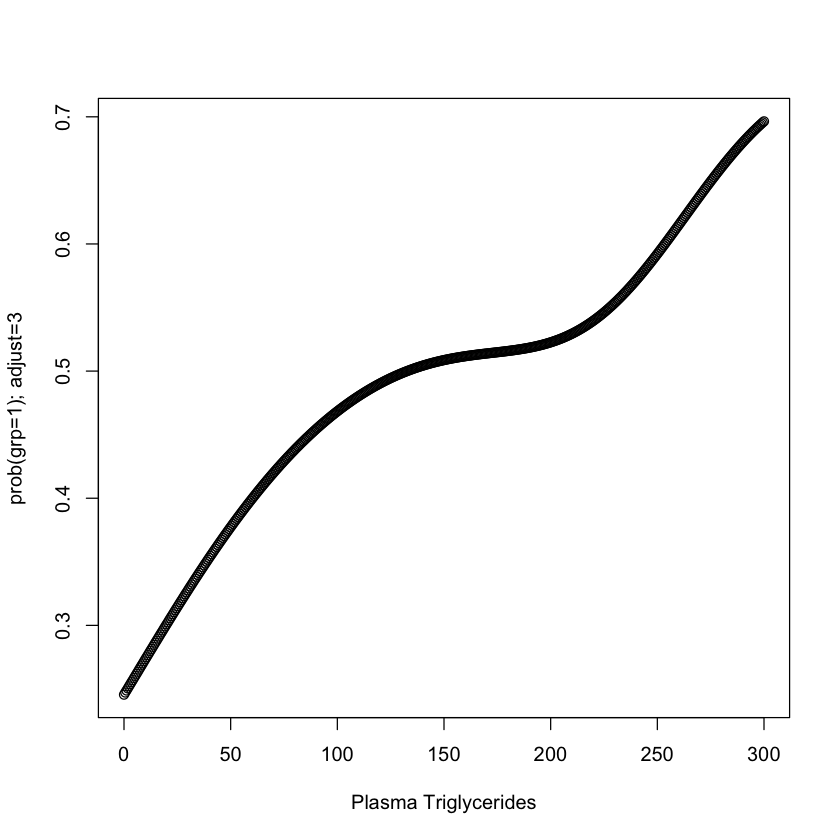

In [29]:
#assuming p(0)=no disease p(1)=yes disease
data_loc<-'/Users/Alexis/Documents/Spring2020/nonparametrics/data/blood.csv'
#data_loc<-'/Users/aporter1350/Documents/Courses/Spring2020/nonparametrics/data/blood.csv'
blood<-read.csv(data_loc)
no_disease=blood$tri[blood$grp==0]
yes_disease=blood$tri[blood$grp==1]

den_no_disease=density(no_disease, bw=bw.SJ(no_disease), from=0, to=300)
plot(den_no_disease, xlab="Plasma Triglycerides", ylab="Density", main="No Heart Disease")

den_yes_disease=density(yes_disease, bw=bw.SJ(yes_disease), from=0, to=300)
plot(den_yes_disease, xlab="Plasma Triglycerides", ylab="Density", main="Yes Heart Disease")
#p(1)/p(0)+p(1)
prob.dis=den_yes_disease$y/(den_yes_disease$y+den_no_disease$y)
#plot of probability function
plot(den_yes_disease$x, prob.dis, xlab='Plasma Triglycerides', ylab='prob(grp=1)')

#estimation of probability patient has heart disease
pr.100=approx(den_yes_disease$x, prob.dis, xout=100)
pr.200=approx(den_yes_disease$x, prob.dis, xout=200)
pr.250=approx(den_yes_disease$x, prob.dis, xout=250)

#adjust=3
den.no=density(no_disease, bw=bw.SJ(no_disease), adjust=3, from=0, to=300)
plot(den.no, xlab="Plasma Triglycerides", ylab="Density", main="No Heart Disease; adjust=3")

den.yes=density(yes_disease, bw=bw.SJ(yes_disease), adjust=3, from=0, to=300)
plot(den.yes, xlab="Plasma Triglycerides", ylab="Density", main="Yes Heart Disease; adjust=3")
#p(1)/p(0)+p(1)
prob.dis_adjusted=den.yes$y/(den.yes$y+den.no$y)
#plot of probability function
plot(den.yes$x, prob.dis_adjusted, xlab='Plasma Triglycerides', ylab='prob(grp=1); adjust=3')

#estimation of probability patient has heart disease
pr.100=approx(den.yes$x, prob.dis_adjusted, xout=100)
pr.200=approx(den.yes$x, prob.dis_adjusted, xout=200)
pr.250=approx(den.yes$x, prob.dis_adjusted, xout=250)

**6.2 Suppose we observe a random variable Z that is distributed according to one of two densities $p_0(.)$ and $p_1(.)$ and on the basis of the observed value of Z, we wish to determine the probability that Z is distributed according to $p_0(.)$**

*Find an expression for $Pr(\theta=0|Z=z)$ and $\frac{Pr(\theta=0|Z=z)}{Pr(\theta=1|Z=z)}$*

$Pr(\theta=0|Z=z)$=$\frac{p_0(z)*(a)}{p_0(z)*(a)+p_1(z)*(1-a)}$

$\frac{Pr(\theta=0|Z=z)}{Pr(\theta=1|Z=z)}$=$\frac{p_0(z)*a}{p_1(z)*(1-a)}$

**6.3 The dataset couples contain the heights of married couples.**

*(a) Plot the two bivariate kernel estimates of the data, one using the normal reference method of choosing the smoothing parameter and one using cross-validation. Plot each density twice, once as a perspecitve plot and once as a contour plot.*

*(b) Comment on the relationship between the estimates based on the different smoothing parameters and on the relative usefulness of perspective and contour plots for displaying the estimates*

While the perspective plot is cool to visualize it's not terribly helpful in my opinion on understanding the shape of the data compared to the contour plots. Though looking at the two contour plots the smoothing parameters don't influence the shape of the data visually. Though I'm sure if I look at the variables saved within the denisty. Our cv had higher values of h for the controu plots yielding smoother density estimates. 

*(c) Based on the results, does the distribution appear to be approximately bivariate normal? Are there any interesting features?*

Based on these plots it would seem that the distribution is bivariate normal. Seems that wives generally marry taller husbands. And tall wives (1700) marry even taller husbands (1900)

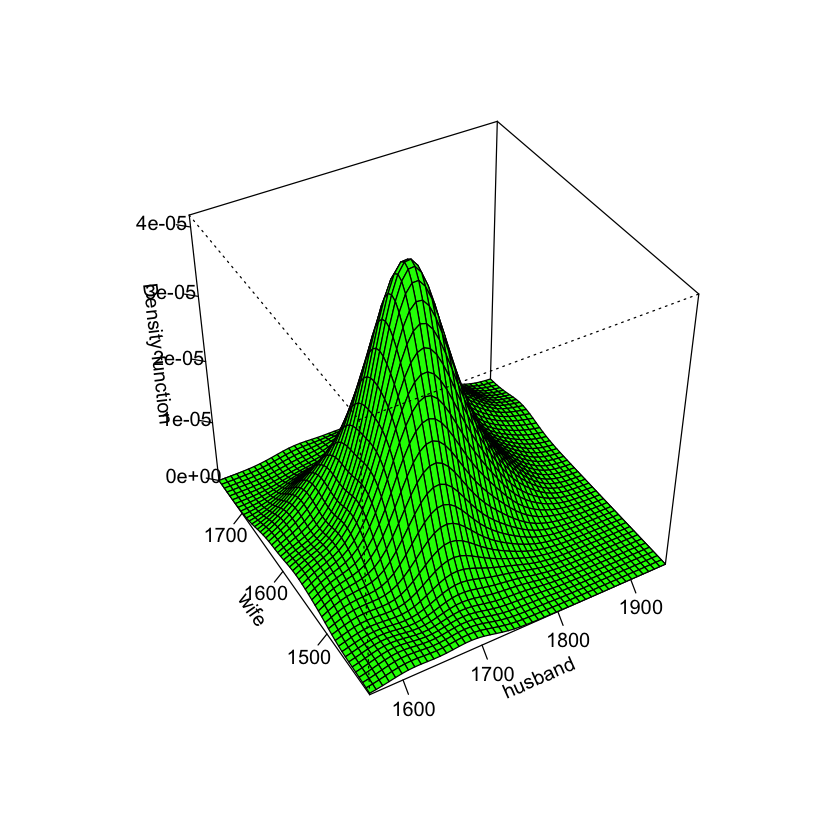

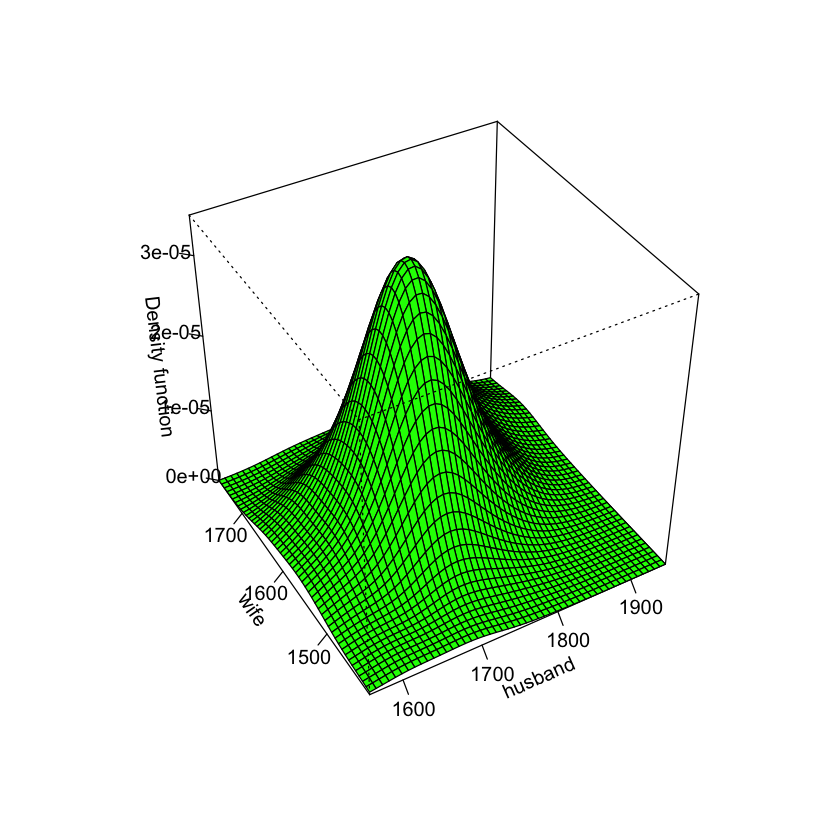

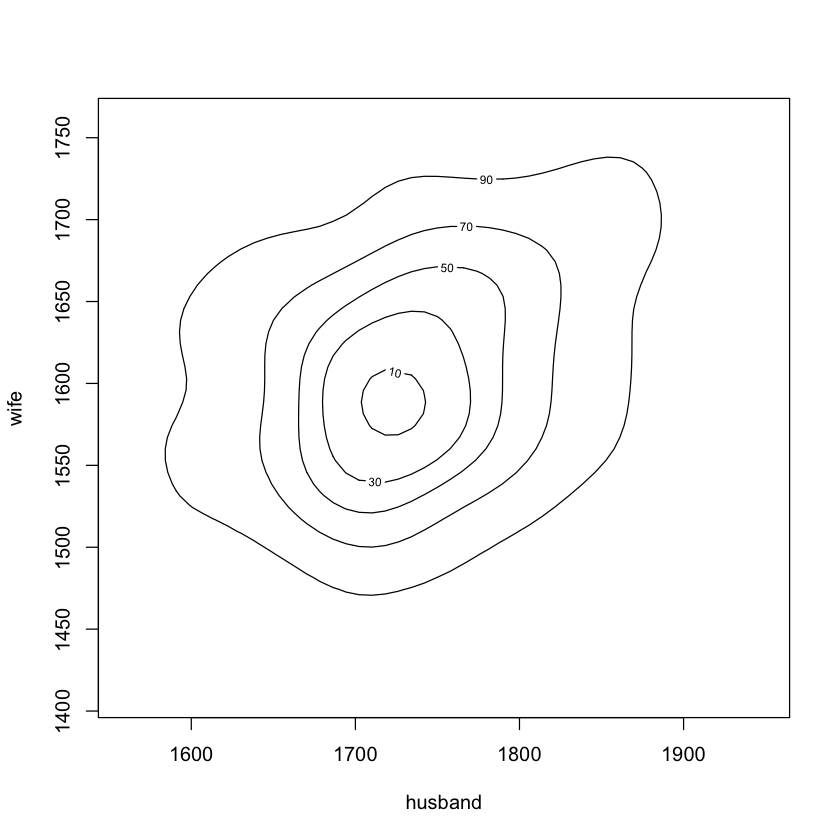

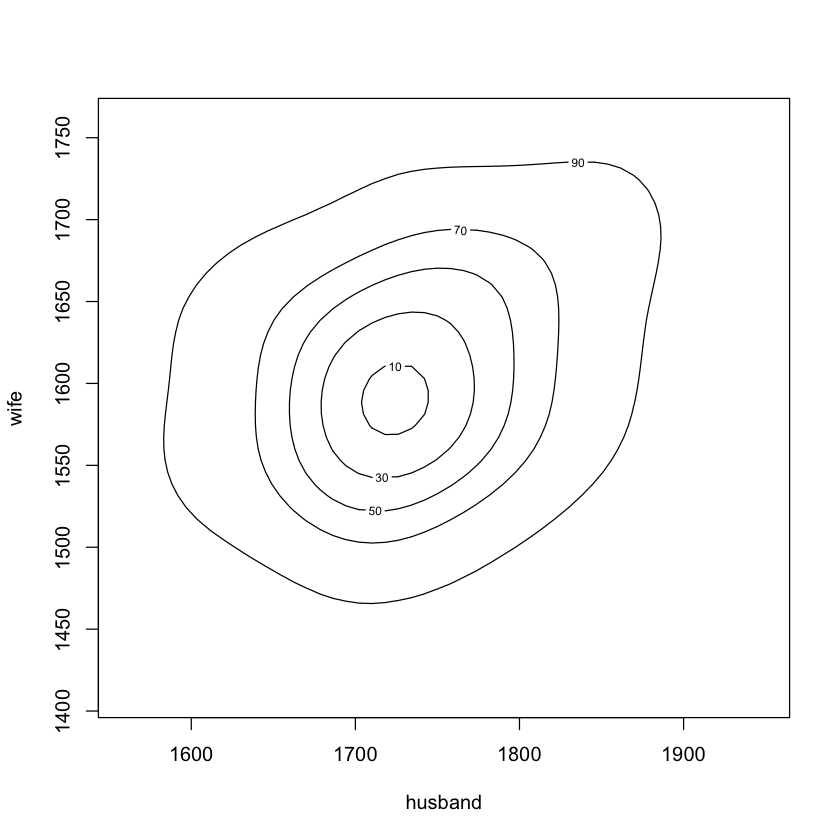

In [42]:
library('sm')
data_loc<-'/Users/Alexis/Documents/Spring2020/nonparametrics/data/couples.csv'
#height in cm
#data_loc<-'/Users/aporter1350/Documents/Courses/Spring2020/nonparametrics/data/couples.csv'
couples<-read.csv(data_loc, header=FALSE)
colnames(couples) <- c("husband", "wife")

#perspective plot
#normal
sm.density(couples)
#cv
sm.density(couples, method='cv')

#contour
#normal
out.normal<-sm.density(couples, display="contour", props=seq(10, 90, 20))
#cv
out.cv<-sm.density(couples, method='cv', display="contour", props=seq(10, 90, 20))

#out.normal$h
#out.cv$h

**6.4 The dataset 'geyser' containes data on time between eruptions, along with the length of eruption of old faithful over the period Aug1 to Aug 15 1985. Repeat exercise 6.3 using the geyser data**

With this dataset it would appear that the cross validation perspective plots help smooth out more of the dataset. The contour plots also suggest that when using the normal distribution we assume greater proportions of the data are represented between peaks compared to the CV plot. The elliptical contours suggest the distribution is bivariate normal. 

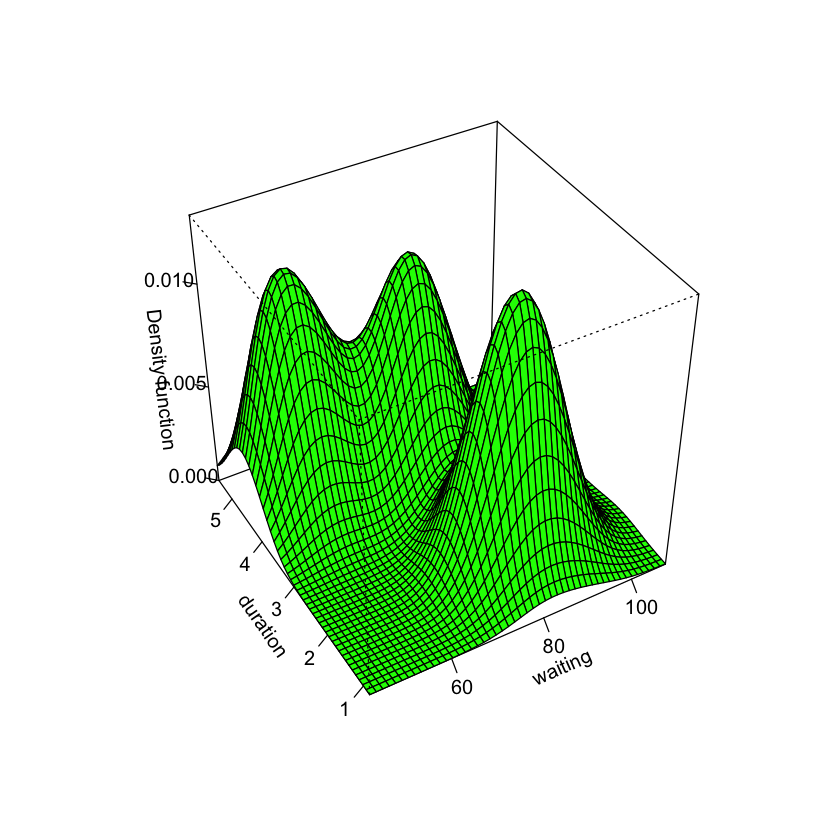

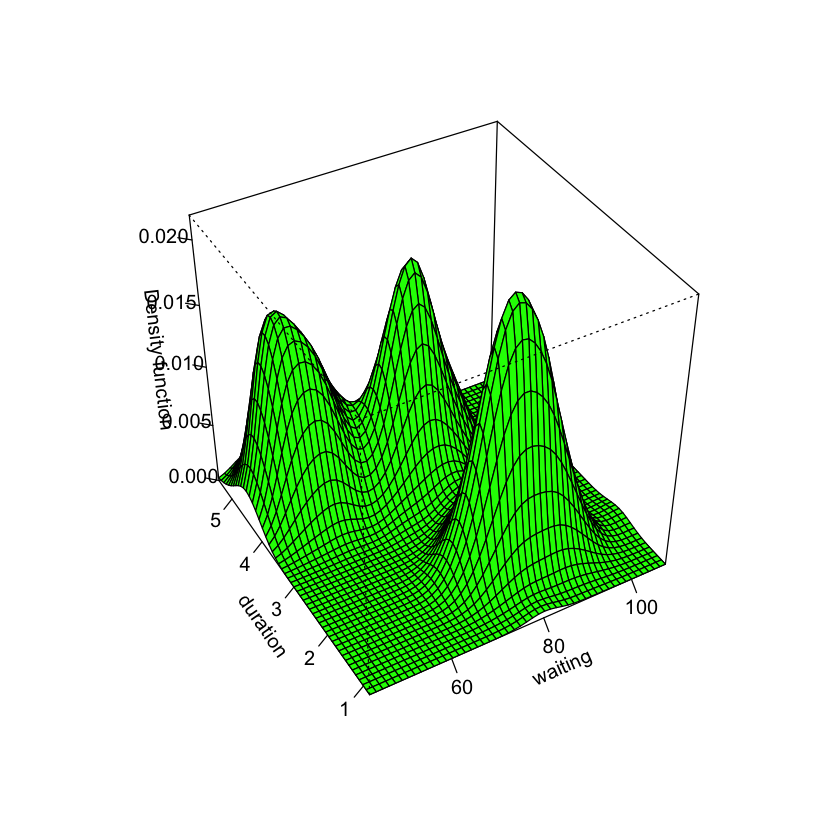

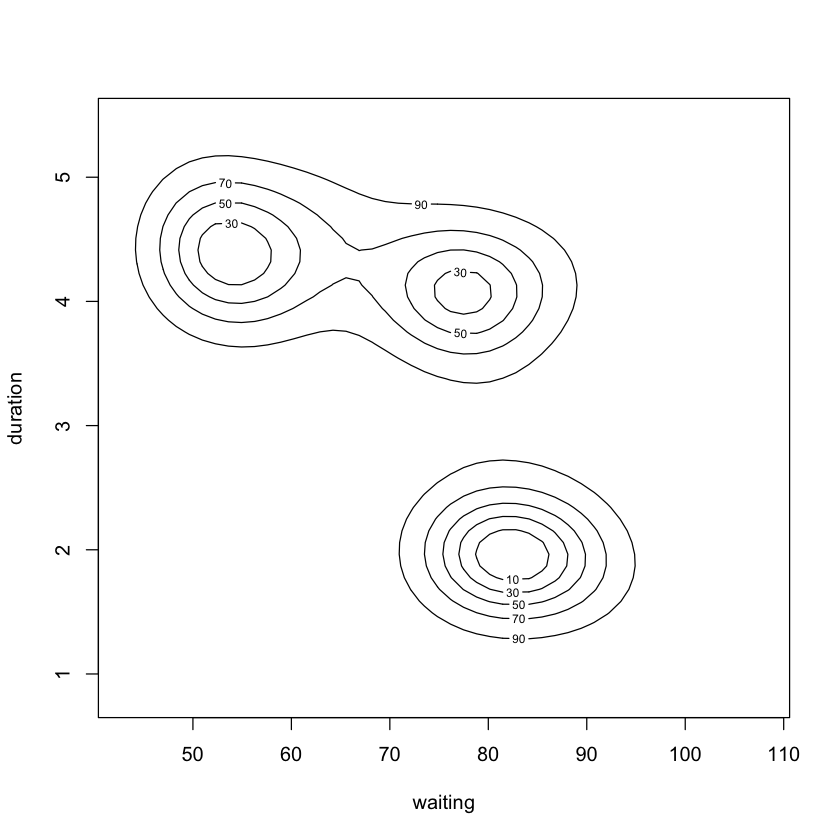

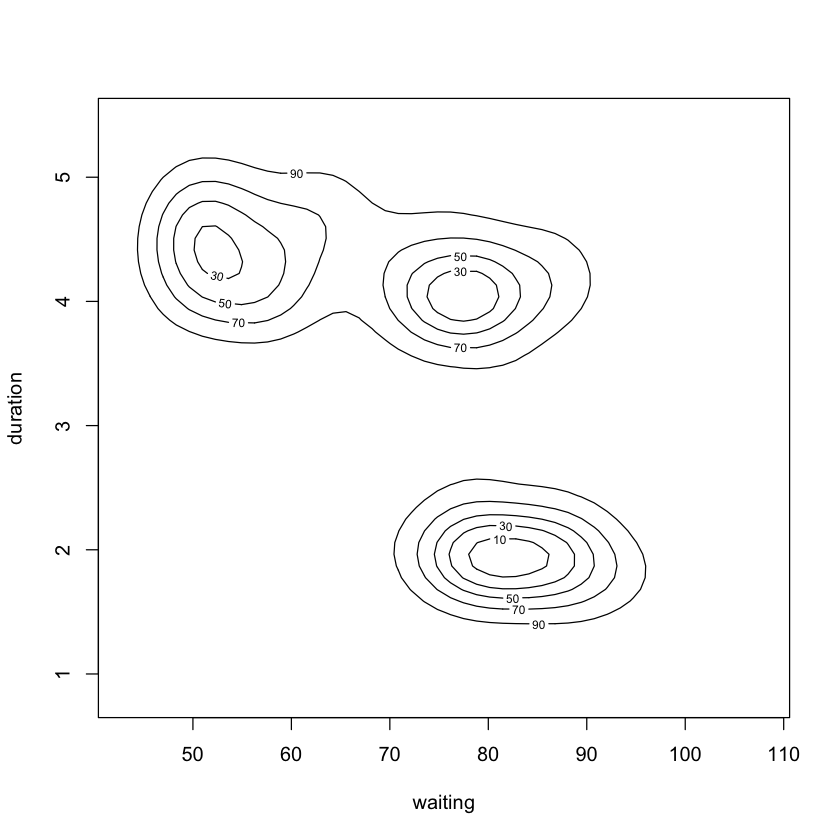

In [43]:
data_loc<-'/Users/Alexis/Documents/Spring2020/nonparametrics/data/geyser.csv'
#data_loc<-'/Users/aporter1350/Documents/Courses/Spring2020/nonparametrics/data/geyser.csv'
geyser<-read.csv(data_loc)

#perspective plot
#normal
sm.density(geyser)
#cv
sm.density(geyser, method='cv')

#contour
#normal
out.normal<-sm.density(geyser, display="contour", props=seq(10, 90, 20))
#cv
out.cv<-sm.density(geyser, method='cv', display="contour", props=seq(10, 90, 20))

#out.normal$h
#out.cv$h

**6.5 The dataset hemophilia has data collected in order to study the detection of hemophlia A carriers. Blood samples from two groups of women were analyzed. The first group did not carry the hemophilia gene; this is known as the non-carrier group. The second group consists of known hemophilia carriers; this is known as the carrier group. Two characteristics of each subjects blood, denoted act and ant, were measured.**

*(a) Plot estimates of the densities of (act, ant) for the non-carrier and carrier groups. Briefly summarize the differences between the estimates for the two groups*

Based on the density plots it would seem that carriers have greater variability in ant and act compared to non carriers. 

*(b) Using the method described in example 6.3 estimate the probability that a subject is a hemophilia A carrier as a function of her values of act and ant; present the result as a plot of the estimated probability function. Choose the smoothing parameters needed using the Sheather-Jones method. Restrict the analysis to values of ant and act in the range (-.4, .2) in the function sm.density*


*(c) Using the result given in part (a) estimate the probability that a subject is a hemophilia carrier given the values of (act, ant) of (-.15,.15),(-.1,.1), and (-.3,.1).*

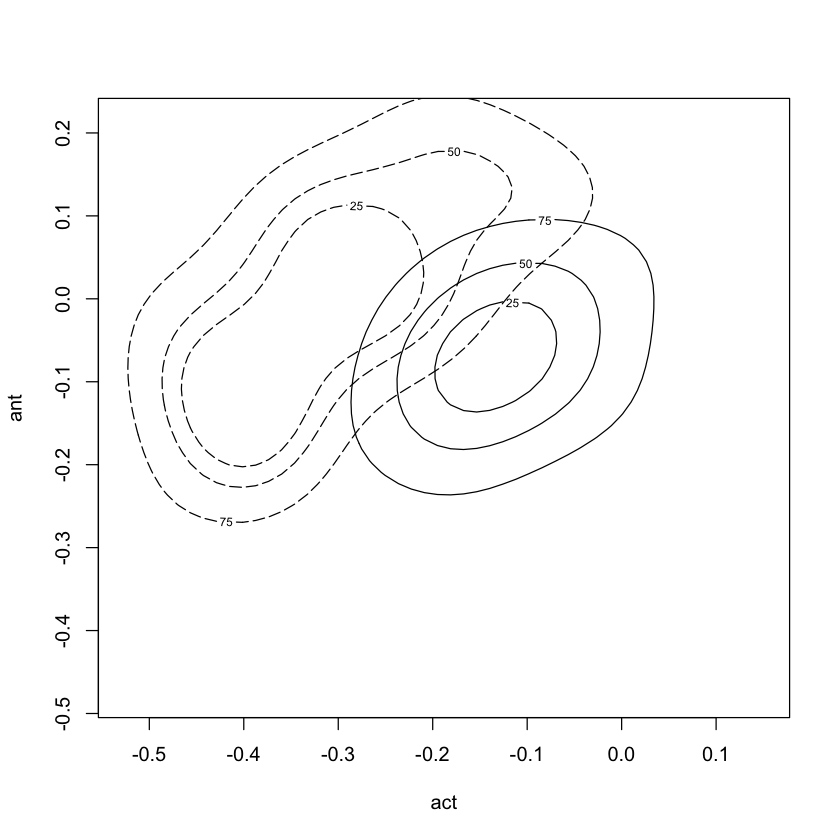

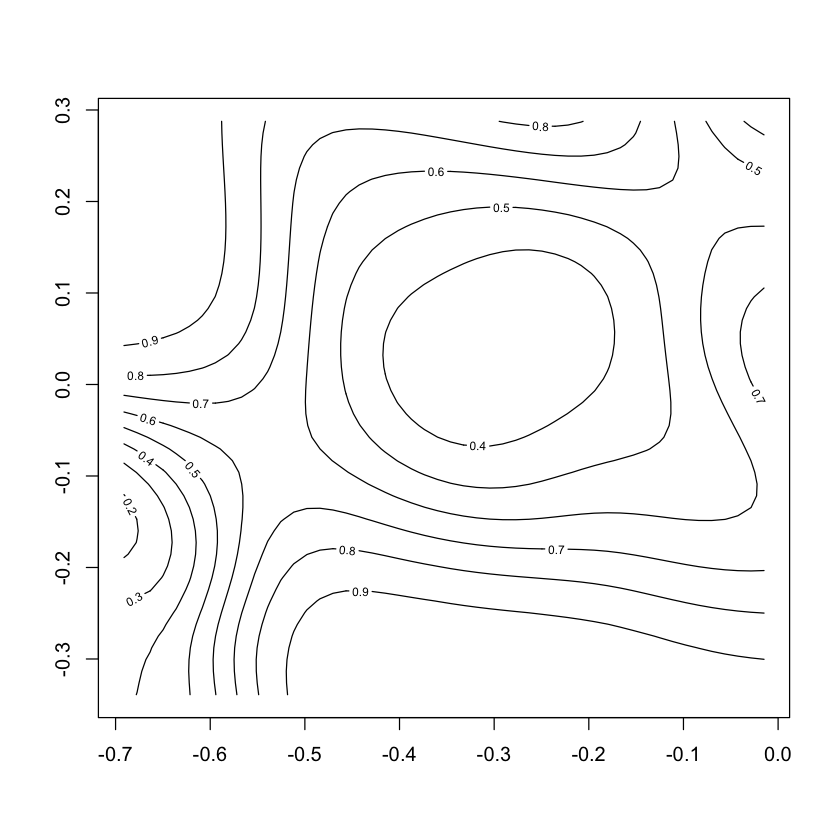

In [76]:
data_loc<-'/Users/Alexis/Documents/Spring2020/nonparametrics/data/hemophilia.csv'
#data_loc<-'/Users/aporter1350/Documents/Courses/Spring2020/nonparametrics/data/hemophilia.csv'
hemophilia<-read.csv(data_loc)

dis.no = subset(hemophilia, grp == 0)
dis.no <- subset(dis.no, select = -c(grp))
dis.yes =subset(hemophilia, grp == 1)
dis.yes <- subset(dis.yes, select = -c(grp))
#density plots
den.no=sm.density(dis.no, display="contour")
den.yes=sm.density(dis.yes, display="contour", add=T, lty=5)

#probability of being a carrier
prob.yes=den.yes$estimate/(den.yes$estimate+den.no$estimate)

#plot
contour(x=den.yes$eval.points[,1], y=den.yes$eval.points[,2], z=prob.yes)

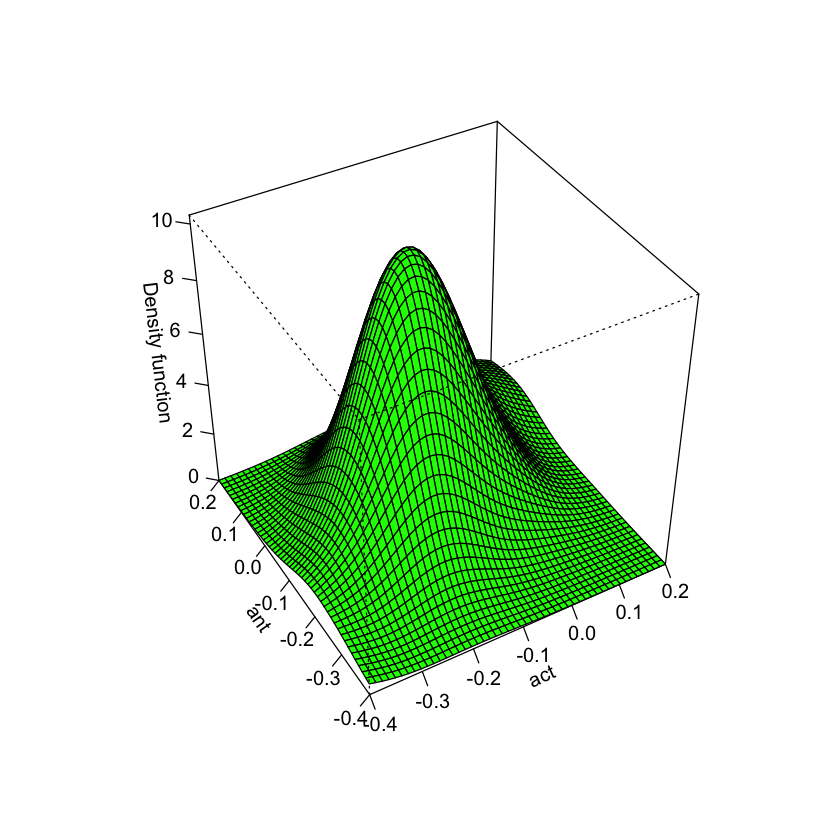

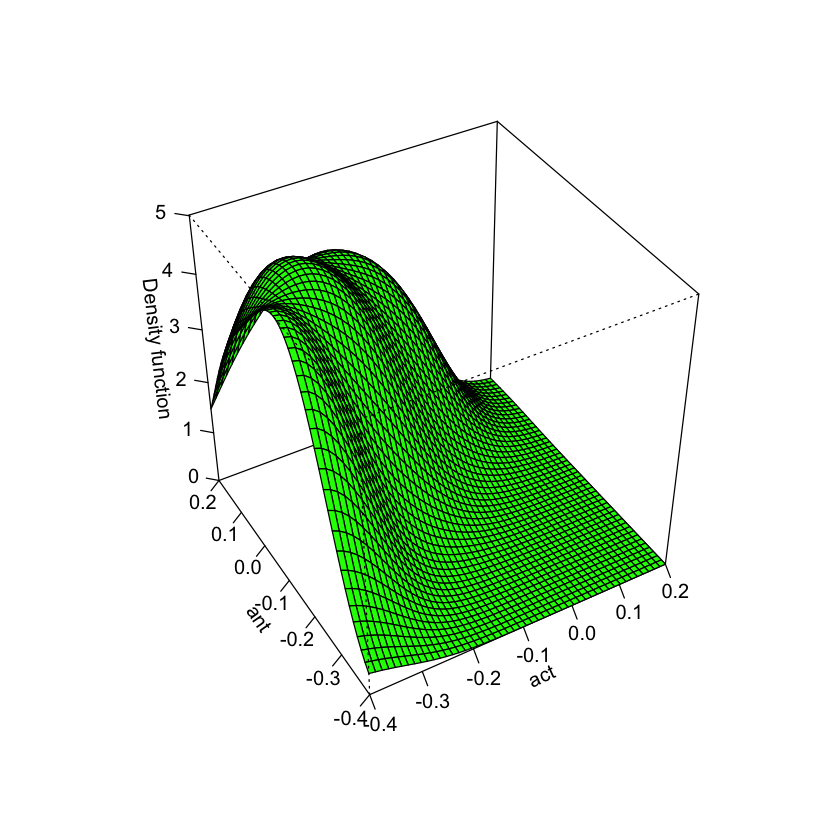

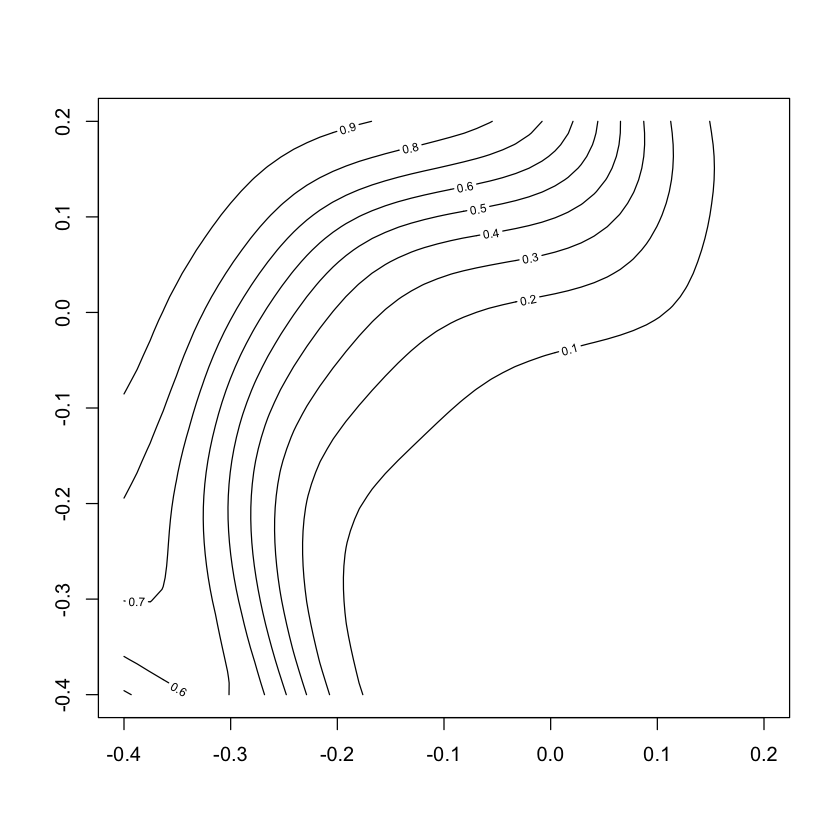

In [83]:
#changing range using SJ
den.no=sm.density(dis.no, xlim=c(-.4,.2), ylim=c(-.4, .2))
den.yes=sm.density(dis.yes, xlim=c(-.4,.2), ylim=c(-.4, .2))
#probability of being a carrier
prob.yes=den.yes$estimate/(den.yes$estimate+den.no$estimate)
#plot
contour(x=den.yes$eval.points[,1], y=den.yes$eval.points[,2], z=prob.yes)

In [78]:
library('pracma')
interp2(x=den.yes$eval.points[,1], y=den.yes$eval.points[,2], Z=t(prob.yes), xp=-.15, yp=.15, method="linear")

[1] 0.4978635

In [79]:

interp2(x=den.yes$eval.points[,1], y=den.yes$eval.points[,2], Z=t(prob.yes), xp=-.1, yp=.1, method="linear")



[1] 0.5582355

In [80]:

interp2(x=den.yes$eval.points[,1], y=den.yes$eval.points[,2], Z=t(prob.yes), xp=-.3, yp=.1, method="linear")



[1] 0.3480504